Un quiosco vende periodico a 1.10 euros cada uno. Cada periodico le cuesta 0.90 euros.Las ventas de periodicos a partir de su experiencia se refleja en la tablas siguiente.
 
|**periodico**|**30**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |

Teniendo en cuenta el costo de 0.20 € por venta perdida y 0.10€ por el resiclaje de cada periodico no vendido determine el beneficio promedio diario si pide 50 periodicos cada dia.

Por simulación: Construimos el modelo en varios pasos.

**PASO 1**. Defina las variables que intervienen en el modelo.

x= numero de periodicos vendidos

**PASO 2**. Formule la distribución de probabilidad de cada variable.

|**periodico**|**30**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

|**periodico**|**30**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |
|F(x)         | 0.2  | 0.45 | 0.70 | 0.90 | 1    |

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

|**periodico**|**30**|**40**|**50**|**60**|**70**|
|-------------|------|------|------|------|------|
|f(x)         | 20%  | 25%  | 25%  | 20%  | 10%  |
|f(x)         | 0.2  | 0.25 | 0.25 | 0.2  | 0.1  |
|F(x)         | 0.2  | 0.45 | 0.70 | 0.90 | 1    |
|Intervalos   |(0,0.2)|(0.2,0.45)|(0.45,0.7)|(0.7,0.9)|(0.9,1)|

**PASO 5**. Genere números aleatorios.

**PASO 6**. Simule las ventas de un dia y calcule el beneficio.

|**Dia**|**numeros aleatorios**|**ventas simuladas**|**ventas reales**|**ventas perdidas**|**periodicos no vendidos**|**beneficio €**|**beneficio promedio €**|
|-------|--------|-----|-----|-----|----|-----|----|
|    1  |  0.23  | 40  | 40  |   0 | 10 | -2  | -2 |
|    2  | 0.73   | 60  | 50  |   10| 0  |   8 |  3 | 


# Si ventas simuladas > pedido
ventas reales = pedido

ventas perdidas =ventas simuladas - pedido

periodicos no vendidos = 0

# Si ventas simuladas <= pedido
ventas reales = ventas simuladas

ventas perdidas = 0

periodicos no vendidos = pedido - ventas reales

Beneficio= (precio unitario de venta X ventas reales) - (coste unitario de adquisicion X pedido) - (coste unitario de reciclaje X periodico no vendido) - (coste de venta perdida X ventas perdidas)



In [ ]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
u=0
x=0
i=0
ventreales=0
ventperdidas=0
novendidos=0

In [ ]:
## distribucion 
def ventassimuladas():
  u=rnd.random()
  if u <0.2:
    x=30
  elif u<0.45:
    x=40
  elif u<0.7:
    x=50
  elif u<0.9:
    x=60
  elif u<1:
    x=70
  return (x)

In [ ]:
def beneficio(pedido): ## periodicos pedidos diariamente
  i = ventassimuladas()
  if i <= pedido :
    ventreales= i
    ventperdidas= 0
    novendidos= pedido - ventreales 
  else :
    ventreales= pedido
    ventperdidas = i - pedido
    novendidos=0
  beneficio = (1.1*ventreales)-(0.9*pedido)-(0.1*novendidos)-(0.20*ventperdidas)
  return beneficio 


In [ ]:
print (beneficio(50))

8.000000000000007


In [ ]:
def benpromedio(iteraciones,pedido):
    i=0
    lista = []
    while i <= iteraciones:
        i += 1
        probabilidad = beneficio(pedido)
        lista.append(probabilidad)
    return np.mean(lista)

In [ ]:
benpromedio(500,50)

1.053892215568866

In [ ]:
def experimento(iteraciones,pedido):
    i=0
    lista = []
    while i <= iteraciones:
        i += 1
        probabilidad = beneficio(pedido)/i
        lista.append(probabilidad)
    return lista

**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para 
garantizar la convergencia del resultado.

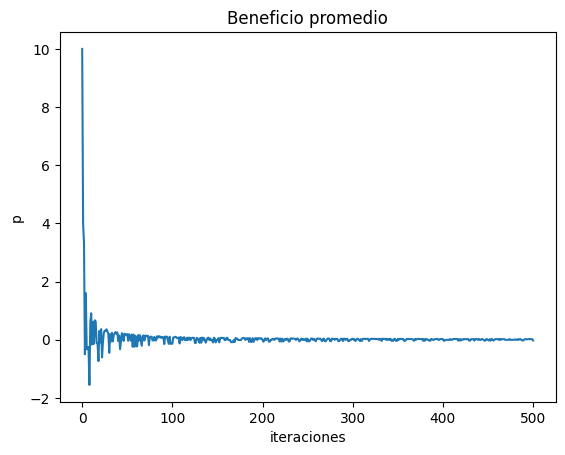

In [ ]:
exp = experimento(500,50)
plt.plot(exp)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Beneficio promedio')
plt.show()

**PASO 8**. Replique el modelo.

In [ ]:
def replicarexperimento(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(benpromedio(500,50)))
    return List

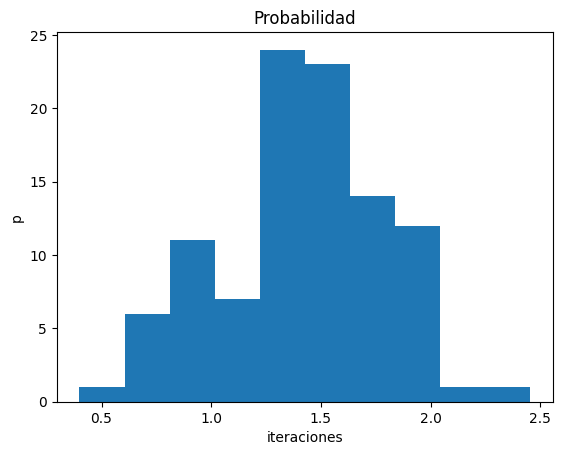

In [ ]:
simulacion = replicarexperimento(100)
plt.hist(simulacion)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()


**PASO 9**. Calcule el beneficio promedio y su desviación 
estándar.

In [ ]:
np.mean(simulacion), np.var(simulacion), np.std(simulacion)

(1.4079041916167703, 0.13698746379496504, 0.37011817544530967)

**PASO 10**. Halle el intervalo de confianza del beneficio promedio con un nivel de confianza del $95 \%$.


In [ ]:
# Cálculo del intervalo de confianza
media = np.mean(simulacion)
desviacion_estandar = np.std(simulacion, ddof=1)
confianza = 0.95
intervalo_confianza = norm.interval(confianza, loc=media, scale=desviacion_estandar / np.sqrt(len(simulacion)))

# Imprimir intervalo de confianza
print("Intervalo de confianza del 95%:", intervalo_confianza)

Intervalo de confianza del 95%: (1.3349969098920915, 1.480811473341449)


# Sensibilidad

In [ ]:
def maxi():#varia el nuemro de pedido desde 1 hasta 70 periodicos
  sense=[]
  i=30
  for i in range (70):
    sense.append(np.mean(benpromedio(500,i)))
  maximo = max(sense)
  indice_maximo = sense.index(maximo)
  return (maximo,indice_maximo)


In [ ]:
maxi() ##resultados debmaxima ganacia y numero de pedido en el cual se da la maxima ganancia en un experimento, es decir varia el nuemro de pedido desde 1 hasta 70 

(3.6606786427145708, 40)

In [ ]:
 list=[] ##resultados de ganacia y pedido en promedio
 lista2=[]
 for i in range (100):
   res1,res2=maxi()
   list.append (res1)
   lista2.append(res2)
 print (np.mean(list),np.mean(lista2))

3.763009980039921 39.84


El maximo se alcansa en pedir 40 periodicos por dia con una ganancia aproximada de  3.7€